In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
model_name = 'MLPClassifier' 
model_path = f'Models/{model_name}.pkl'
report_path = 'Reports/'
dataset_path = 'datasets_v4/'

In [12]:
# Load the model
model = pickle.load(open(model_path, 'rb'))

In [13]:
# load the test data
x_text = np.load(os.path.join(dataset_path, 'x_test_1d.npy'))
y_test = np.load(os.path.join(dataset_path, 'y_test_1d.npy'))
classes = np.loadtxt(os.path.join(dataset_path, 'classes.txt'), dtype=str)

print('Test data shape: ', x_text.shape)
print('Test labels shape: ', y_test.shape)
print('Classes: ', classes)

Test data shape:  (9727, 182)
Test labels shape:  (9727, 7)
Classes:  ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprised']


In [14]:
# Predict the test data
y_pred = model.predict(x_text)

AttributeError: 'SVC' object has no attribute 'support_vectors_'

In [ ]:
# Convert one-hot to index
if model_name in ['LinearRegression', 'MLPClassifier']:
    y_pred_c = np.argmax(y_pred, axis=1) # for one-hot
else:
    y_pred_c = y_pred

print('e_pred_shape', y_pred_c.shape)
y_test_c = np.argmax(y_test, axis=1)

e_pred_shape (9727,)


In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test_c, y_pred_c)

print('Accuracy: ', accuracy)

# Save Accuracy
with open(os.path.join(report_path, model_name + '_accuracy.txt'), 'w') as f:
    f.write('Accuracy: ' + str(accuracy))

Accuracy:  0.5302765498098078


In [ ]:
# Genertae the classification report
report = classification_report(y_test_c, y_pred_c, target_names=classes)

print('Classification report: \n', report)

# Save the classification report
with open(os.path.join(report_path, model_name + '_classification_report.txt'), 'w') as f:
    f.write(report)

Classification report: 
               precision    recall  f1-score   support

       angry       0.63      0.69      0.66      1538
     disgust       0.47      0.41      0.44      1539
        fear       0.79      0.32      0.46      1538
       happy       0.44      0.55      0.49      1539
     neutral       0.52      0.50      0.51      1516
         sad       0.45      0.66      0.53      1537
   surprised       0.88      0.69      0.77       520

    accuracy                           0.53      9727
   macro avg       0.60      0.55      0.55      9727
weighted avg       0.57      0.53      0.53      9727



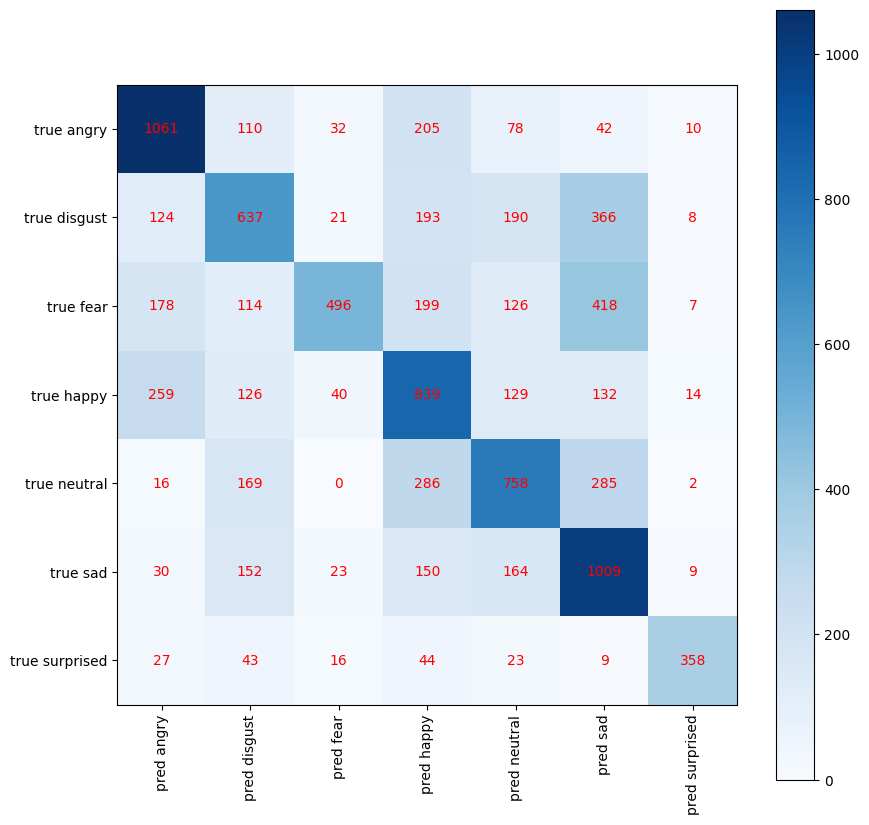

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_c, y_pred_c)

# Plot and Save the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, cmap='Blues')
plt.xticks(np.arange(len(classes)), ["pred " + c for c in classes], rotation=90)
plt.yticks(np.arange(len(classes)), ["true " + c for c in classes])
plt.colorbar()

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.savefig(os.path.join(report_path, model_name + '_confusion_matrix.png'))
plt.show()